# Association Rule Mining

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import networkx as nx 
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize

### Introduction

In this section, I am going to apply association rule mining (ARM) on the modified text data and utilize the apriori algorithm to generate rules that are significant in support, confidence, and lift level.  Remember that the text data was gathered from the Twitter API using four different health insurance brands as the hashtag, and each data is a tweet from a user.  The variables in this dataset include text(tweet), author, date, label, etc.  ARM will be employed only on the text variable and rules will be generated based on the tokenized word in each tweet.  The result of an ARM can discover the inner relations between the words in a tweet.  For example, we may find out a rule says that if someone mentioned the word "health" and "disease" in a tweet, he/she will very likely mention "insurance" as well.  ARM has demonstrated critical analytical importance in many areas because its rules can help the market implement better policies.  However, in this project, since the initial data was not collected for Market Basket Analysis, the application of ARM will be more for practice, and the final rules may be less informative and meaningful. 

**What is a transaction data?**  

Transactional data is information that is captured from transactions. It records the time of the transaction, the place where it occurred, the price points of the items bought, the payment method employed, discounts if any, and other quantities and qualities associated with the transaction. An example of a simplied transaction data is presented below. The column TID stands for the transaction ID.  

| TID | ITEMS |
| --- | --- | --- |
| 1 | Bread, Coke, Milk |
| 2 | Milk, Napkin, Egg |
| 3 | Coke, Egg, Papertowel |
| 4 | Bread, Papertowel |
| 5 | Milk, Bread, Egg |

**How are tweets going to look like in transaction data?**

By this point, you might be wondering how do we apply ARM to tweets that look nothing like transactions.  But in fact, itemset in transactional data does not necessarily have to be a real collection of items in someone’s checkout basket, it can take demographic features, categorical variables, or a bag of words like a tweet.  All we need to do is to tokenize each tweet and make each word an item in the itemset.  The inner relationships between the 'items' will be the correlation between words.





In [9]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        # print("=====================================")
        # print(results[i])
        # print(len(list(results[i])))
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

In [10]:
def convert_to_network(df):

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [11]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 7)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']/5.0) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Color and size plotted by attribute')
    # ax.set_aspect('equal', 'box')
    # plt.colorbar(cmap)

    # fig.savefig("test.png")
    plt.show()

In [12]:
data = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/text.csv')
data = data['text']
transactions= [word_tokenize(data[i]) for i in range(len(data))]

In [33]:
print("Transactions:",pd.DataFrame(transactions).head())
results = list(apriori(transactions, min_support=0.05, min_confidence=0.05, min_length=1, min_lift=0, max_length=10))     #RUN APRIORI ALGORITHM
pd_results=reformat_results(results)
print("Results\n",pd_results.head())

Transactions:                0      1        2           3           4       5          6   \
0  loyolaramblers    𝗧𝗵𝗲  𝗥𝗮𝗺𝗯𝗹𝗲𝗿  𝗥𝗼𝘂𝗻𝗱𝘁𝗮𝗯𝗹𝗲     present   aetna  christian   
1         pom_pnw  aetna     give   directory    resident   house    address   
2      peds_ortho  aetna        ’      doctor           ’  office       take   
3           aetna  twice     deny   necessary  medication     b/c   whatever   
4      peds_ortho  aetna      pay       copay        meet     oop      limit   

             7               8          9   ...    42    43    44    45    46  \
0        thomas            join    podcast  ...  None  None  None  None  None   
1  psychiatrist  recommendation       None  ...  None  None  None  None  None   
2         copay    subsequently  reimburse  ...  None  None  None  None  None   
3        stupid          policy     giving  ...  None  None  None  None  None   
4             ’             pay      copay  ...  None  None  None  None  None   

     47    48    4

In [31]:
result_df = pd_results.iloc[[12,13,14,15,18,19,21,22,23,24],:] 
print(result_df)

                  rhs                lhs      supp      conf  supp x conf  \
12            [aetna]           [health]  0.059480  0.242424     0.014419   
13           [health]            [aetna]  0.059480  0.500000     0.029740   
14           [anthem]         [national]  0.059480  0.307692     0.018301   
15         [national]           [anthem]  0.059480  0.888889     0.052871   
18            [group]     [unitedhealth]  0.096654  0.896552     0.086656   
19     [unitedhealth]            [group]  0.096654  0.565217     0.054631   
21            [group]  [#, unitedhealth]  0.052045  0.482759     0.025125   
22     [unitedhealth]         [#, group]  0.052045  0.304348     0.015840   
23         [#, group]     [unitedhealth]  0.052045  0.933333     0.048575   
24  [#, unitedhealth]            [group]  0.052045  0.700000     0.036431   

        lift  
12  2.037879  
13  2.037879  
14  4.598291  
15  4.598291  
18  5.242879  
19  5.242879  
21  6.493103  
22  5.457971  
23  5.457971  
24

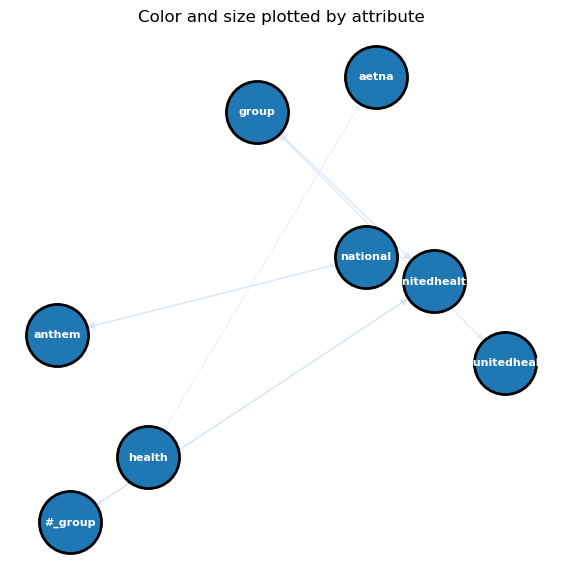

In [32]:
G=convert_to_network(result_df)
plot_network(G)